# Kevin Egedy

<h1>Lesson 3. Classification: Credit worthiness from German bank</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/Flag_map_of_Germany.svg" style="height:200px;">
  
  <p>In this exercise you will predict credit worthiness of custmers of a German bank (<a href="https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)">provided by Hans Hofmann from Univeristy of Hamburg</a>). The data we will be working with here is a reduced version of the full dataset.</p>
<p>The following features are available for the 1000-row dataset:</p>
<ul>
<li>Class: Credit worthiness (what you are trying to predict)</li>
<li>Duration: Duration of the credit (in months) </li>
<li>Amount: Amount of money asked for (in Deutche Marks (DM))</li>
<li>InstallmentRatePercentage: Installment rate in percentage of disposable income </li>
<li>ResidenceDuration: Number of years at current residence</li>
<li>Age: Person's age</li>
<li>NumberExistingCredits: Number of credit accounts</li>
<li>NumberPeopleMaintenance: Number of people being liable to provide maintenance for the credit</li>
<li>Telephone: Is there a phone number associated with the customer name?  </li>
<li>ForeignWorker: Is the person a foreign worker?</li>
<li>CheckingAccountStatus: Amount of money in the checking account (in DM)<ul>
<li>CheckingAccountStatus.lt.0</li>
<li>CheckingAccountStatus.0.to.200</li>
<li>CheckingAccountStatus.gt.200</li>
</ul></li>
<li>CreditHistory: Past credit history<ul>
<li>CreditHistory.ThisBank.AllPaid</li>
<li>CreditHistory.PaidDuly</li>
<li>CreditHistory.Delay</li>
<li>CreditHistory.Critical</li>
</ul></li>
</ul>

<p>This dataset is available in <a href="http://caret.r-forge.r-project.org/">'caret'</a> library. Let's load it and see how it looks:</p>

In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option("display.max_rows", 101)

# loading the training and test dataset
credit_train = pd.read_csv('../data/credit_train.csv')
credit_test = pd.read_csv('../data/credit_test.csv')

credit_train.head()

,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical
0,Good,6,1169,4,4,67,2,1,0,1,1,0,0,0,0,0,1
1,Bad,48,5951,2,2,22,1,1,1,1,0,1,0,0,1,0,0
2,Good,12,2096,2,3,49,1,2,1,1,0,0,0,0,0,0,1
3,Good,36,9055,2,4,35,1,2,0,1,0,0,0,0,1,0,0
4,Good,24,2835,3,4,53,1,1,1,1,0,0,0,0,1,0,0


<h3>Q.0. Write code to display the count of null values in each column<h3>

In [2]:
# Command:
credit_train.isnull().sum()

# One sentance summary:
# Credit train doesn't contain any null values in any column.

Class                             0
Duration                          0
Amount                            0
InstallmentRatePercentage         0
ResidenceDuration                 0
Age                               0
NumberExistingCredits             0
NumberPeopleMaintenance           0
Telephone                         0
ForeignWorker                     0
CheckingAccountStatus.lt.0        0
CheckingAccountStatus.0.to.200    0
CheckingAccountStatus.gt.200      0
CreditHistory.ThisBank.AllPaid    0
CreditHistory.PaidDuly            0
CreditHistory.Delay               0
CreditHistory.Critical            0
dtype: int64

<h3>Q.1. How does the distribution of credit amount look like? (Use a histogram plot to answer this question)</h3>

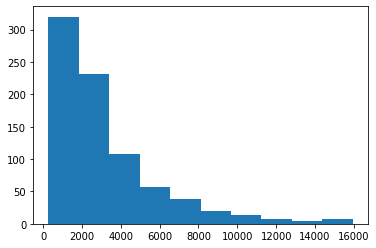

In [3]:
# Put the command (or commands) here that would give an answer to the above question.
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
%matplotlib inline

# TODO
# https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html
counts, bins = np.histogram(credit_train.Amount)
plt.hist(bins[:-1], bins, weights=counts);

<h3>Q.2. Can you generate a plot that shows CreditHistory.Critical vs. Credit Worthiness for the training data. Can you comment whether person with critical credit history is more credit worthy?</h3> 

CreditHistory.Critical,0,1
Class,,
Bad,208,38
Good,373,189


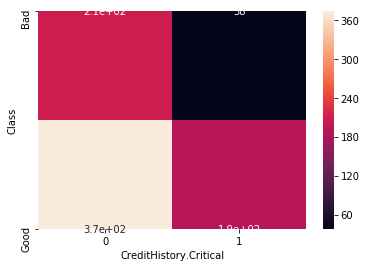

In [4]:
# reshape flights dataeset in proper format to create seaborn heatmap
summary = credit_train.groupby(['CreditHistory.Critical','Class']).size().reset_index().rename(columns={0:'count'})
df = summary.pivot('Class', 'CreditHistory.Critical', 'count') 
df
sn.heatmap(df, annot=True)# create seaborn heatmap

# Comment
# Critical credit history  is not a good metric for determining credit worthiness alone. 
# When critical credit history is 0, it is almost a 50-50 chance of being good/bad.

<h3>Q.3. Binarize the y output for e.g. 0 = 'bad' credit; 1 = 'good' credit. </h3>

In [5]:
credit_train.loc[credit_train['Class'] == 'Bad','Class'] = 0
credit_train.loc[credit_train['Class'] == 'Good','Class'] = 1
credit_train.Class.describe()

credit_test.loc[credit_test['Class'] == 'Bad','Class'] = 0
credit_test.loc[credit_test['Class'] == 'Good','Class'] = 1
credit_test.Class.describe()

count    808.000000
mean       0.695545
std        0.460461
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Class, dtype: float64

count    192.000000
mean       0.718750
std        0.450785
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Class, dtype: float64

<h3>Q.4. Generate a logistic regression model that uses the one predictor CreditHistory.Critical. Provide a summary of the model. </h3>

In [6]:
from sklearn.linear_model import LogisticRegression

y_test = credit_test.Class
X_test = credit_test[['CreditHistory.Critical']]
y_train = credit_train.Class
X_train =credit_train[['CreditHistory.Critical']]
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
import statsmodels.api as sm

print('\nSTATSMODELS SUMMARY')
statsModels = sm.Logit(y_train, X_train).fit()
print(statsModels.summary())


STATSMODELS SUMMARY
Optimization terminated successfully.
         Current function value: 0.625326
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  808
Model:                          Logit   Df Residuals:                      807
Method:                           MLE   Df Model:                            0
Date:                Tue, 27 Oct 2020   Pseudo R-squ.:                -0.01747
Time:                        17:06:37   Log-Likelihood:                -505.26
converged:                       True   LL-Null:                       -496.59
Covariance Type:            nonrobust   LLR p-value:                       nan
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
CreditHistory.Critical     1.6042      0.178      9.023      0.

<h3>Q.5. Using the developed model, predict the values in credit_test and use it to output a confusion matrix.</h3>

(0, 54, 0, 138)

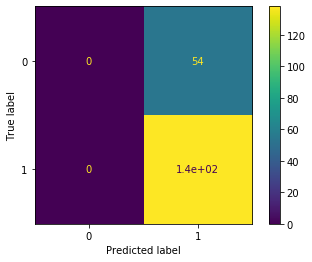

In [8]:
# sklearn.metrics.plot_confusion_matrix(estimator, X, y_true, *, labels=None, sample_weight=None, normalize=None, display_labels=None, include_values=True, xticks_rotation='horizontal', values_format=None, cmap='viridis', ax=None)
# sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

y_pred = log_reg.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

plot_confusion_matrix(log_reg, X_test, y_test)
plt.show()

<h3>Q.6. What is the accuracy of the model on the test data?</h3>

In [9]:
# Command that outputs acccuracy

#from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred, digits=3))

# sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
from sklearn.metrics import accuracy_score
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}%')

Accuracy score: 0.71875%


<h3>Q.7. Generate the ROC curve.</h3>

[0.64368683 0.82827297]


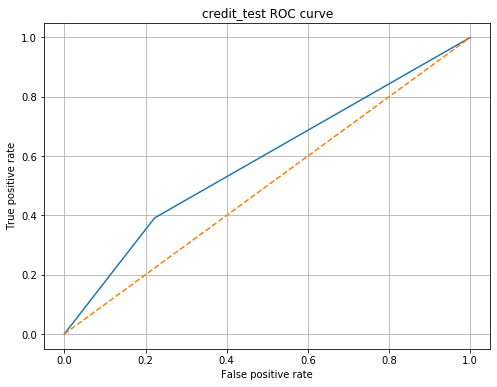

In [10]:
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
# sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)

from sklearn.metrics import roc_curve 
fig,ax = plt.subplots(figsize=(8,6))

# statsmodels
#y_score = statsModels.predict(credit_test[['CreditHistory.Critical']])

# sklearn
y_test = credit_test.Class
X_test = credit_test[['CreditHistory.Critical']]
y_score = log_reg.predict_proba(X_test)
y_score = y_score[:,1]
print(pd.Series(y_score).unique())
baseline = [0 for _ in range(len(y_test))]
fpr0, tpr0, thresholds0 = roc_curve(y_test, y_score)
fpr1, tpr1, thresholds1 = roc_curve(y_test, baseline)

ax.plot(fpr0,tpr0)
ax.plot(fpr1,tpr1,linestyle='--')

ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')
plt.title('credit_test ROC curve')
plt.grid(True)
plt.show();

<h3>Q.8. What is the ROC AUC of the model on the test data?</h3>

In [11]:
# Command(s):
# sklearn.metrics.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)
from sklearn.metrics import roc_auc_score 

print(f'ROC AUC: {round(roc_auc_score(y_test, y_score),5)}')

ROC AUC: 0.58454


<h3>Q.9. Calculate LDA model on credit_train.</h3>

In [12]:
# class sklearn.discriminant_analysis.LinearDiscriminantAnalysis(*, solver='svd', shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
y_test = credit_test.Class
X_test = credit_test.drop('Class',axis=1)
y_train = credit_train.Class
X_train = credit_train.drop('Class',axis=1)
y_pred = lda.fit(X_train, y_train).predict(X_test)
y_score = lda.predict_proba(X_test)

(18, 36, 24, 114)

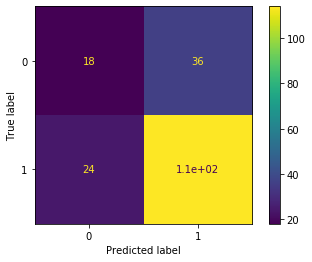

In [13]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

plot_confusion_matrix(lda, X_test, y_test)
plt.show()

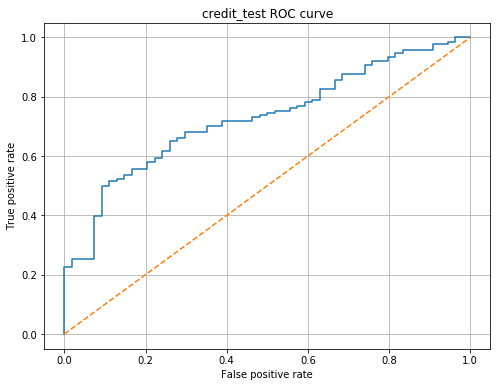

In [14]:
fig,ax = plt.subplots(figsize=(8,6))

y_score = y_score[:,1]
baseline = [0 for _ in range(len(y_test))]
fpr0, tpr0, thresholds0 = roc_curve(y_test, y_score)
fpr1, tpr1, thresholds1 = roc_curve(y_test, baseline)

ax.plot(fpr0,tpr0)
ax.plot(fpr1,tpr1,linestyle='--')

ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')
plt.title('credit_test ROC curve')
plt.grid(True)
plt.show();

In [15]:
# ROC AUC
print(f'ROC AUC: {round(roc_auc_score(y_test, y_score),5)}')

ROC AUC: 0.7288


<h3>Q.10. What is the accuracy of the new model?</h3>

In [16]:
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}%')

Accuracy score: 0.6875%


<h3>Q.11. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

<p>
Answer: 
    
I greatly enjoyed this exercise in exploring classification. I greatly valued learning other metrics to judge model performance. In this assignment, I show that accuracy is not always important and can be misleading. It is not surprising that the initial logistic regression model didn't perform well. Looking at the data using a pivot table showed that critical history credit had very little importance in the model. Lastly, the ROC curves are a useful tool in analyzing model decisions.
</p>